# Visualization of High-Dimensional Data

<hr>

**Linear Algebra Review**<br>
A matrix $M$ is an orthogonal projection onto a subspace $S$ if
1. $M$ is symmetric
1. $M^2 = M$, and
1. $S =$ {$y: Mx = y$ for some $x \in R^n$}

In general, the projection of a vector $x \in R^d$ onto a unit vector $u$ is defined to be
$proj_u x := (u \cdot x) \cdot u$

To form the unit vector, take the original vector $v$ and divide by its norm $\lVert v \rVert$

$u = \frac{v}{\lVert v \rVert}$

The empirical variance of a dataset in a given direction is calculated by projecting each obervation by the unit vector of the given direction and then calculating its variance. This turns out to be the same as calculating its empirical covariance matrix first before projecting it with the unit vector.

$Var(u \cdot X_1, \dots, u \cdot X_n) = u^T S u$

where $S = Cov(X) = \frac{1}{n-1} \sum_{i = 1}^{N} x_i x_i^T$

<hr>

**Orthogonal matrices**

A matrix $P \in R^{d x d}$ is orthogonal if $PP^T = P^TP = I_d$. If $A = PDP^T$, where $D$ is a positive definite diagonal matrix and $P$ is an orthogonal matrix with column vectors, $v_1, \dots, v_n$, then $A \cdot v_1 = \lambda_1 \cdot v_1$ and $A$ is a symmetric, positive definite matrix

For all symmetric matrices, $A$, with real entries, $A = PDP^T$

where
- $P \in R^{d x d}$ is an orthogonal matrix with eigenvectors as column vectors, and
- $D \in R^{d x d}$ is a diagonal matrix with eigenvalues on its diagonals

*Remark 1*: 

Positive semidefinite matrices and orthogonal matrices have mathematically different properties. In particular, most positive semidefinite matrices are not orthogonal, and most orthogonal matrices are not positive semidefinite. For example, a covariance matrix is a symmetric and positive semidefinite matrix but is not an orthogonal matrix.

*Remark 2*: 

In PCA, the strategy is to diagonalize the matrix (empirical covariance) and select the eigenvectors whose eigenvalues are the largest. This gives us the primary axes that captures the maximum variance about the data.

<hr>

**Principal Component Analysis (PCA)**<br>
Reduce to a few dimensions which contains the largest spread/information about the data.

$X^T X = \Sigma = V \Lambda V^T$

Definitions:
1. Maximize projection variance (direction with largest variance)
1. Minimize projection residuals (smallest orthogonal distance to all points)
1. Spectral decomposition
    1. Given covariance matrix, $S$, a symmetric and positive semidefinite matrix, 
    1. Decompose it into $S = V \Lambda V^T$
        - $\Lambda$ is a diagonal matrix with eigenvalues (variances along PCs) of $S$
        - $V$ is orthogonal matrix with eigenvectors of $S$
        
    1. Find the directions (eigenvectors) with the largest eigenvalues.

Find a projection vector, $u$, such that it maximizes the empirical variance spanned by $u$, i.e. the principal axes that captures the maximum variance/information about the data.

$\displaystyle\arg \max_{\substack{u:\lVert u \rVert^2_2 = 1}} u^T S u$

Practical tips:
- Use correlation matrix instead of covariance to ensure robustness against scale
- Keep principal components where eigenvalues (of the correlation matrix) are larger than 1 which indicates that the particular principal component has above average variance explained
- Total variance explained by the principal components is the sum of the eigenvalues of the covariance matrix
    - $\therefore$ %Variance explained by a principal component is given by $\frac{\lambda_i}{\sum_{j = 1}^{p} \lambda_j}$


<hr>

**Mutidimensional Scaling (MDS)**<br>
MDS is a technique for reducing data dimensions while attempting to preserve the original **euclidean** distances between high-dimensional data points

Given a distance matrix $D \in R^{n x n}$ between $n$ data points, map points $y_1, \dots, y_n \in R^q$ where $q$ is small (2 or 3)

- Classical MDS: Minimize $\sum_{i=1}^{n} \sum_{j=1}^{n} (D_{ij} - \lVert y_i - y_j \rVert_2)^2$, where $D$ is a Euclidean distance matrix between dimensions
- Weighted MDS: Add a weighting with $w_{ij} \geq 0$
- Non-metric MDS: Minimize $\sum_{i=1}^{n} \sum_{j=1}^{n} (\theta(D_{ij}) - \lVert y_i - y_j \rVert_2)^2$ where D is a dissimilarity matrix (rankings) and $\theta$ is an increasing function that does not alter the rankings
    - Able to find low-dimensional embedding that respects rankings
    - Very time-consuming as it needs to be optimized over increasing function, $\theta$
    
General approach of Classical MDS:<br>
First convert a distance matrix $D$, with $D_{ij} = \lVert x_i - x_j \rVert_2$ into a positive semidefinite matrix $XX^T$, namely the [Gram matrix](https://en.wikipedia.org/wiki/Gram_matrix)

$B = XX^T = -\frac{1}{2} (I - \frac{1}{n} 11^T) \cdot D^2 \cdot (I - \frac{1}{n} 11^T)$, where $1$ is a vector of ones and $D$ is a matrix with element $D_{ij}^2 = (d_{ij})^2 = (XX^T)_{ii} + (XX^T)_{jj} - 2(XX^T)_{ij}$

Objective: Find a low-dimensional ($q$) embedding, $Y$, that best represents the data

$\displaystyle\arg \min_{\substack{Y}} trace(XX^T - YY^T)^2$ - the Frobenius norm

Eigenvalue decomposition of the Gram matrix: $XX^T = V \Lambda V^T$, where columns of $V$ are eigenvectors of $XX^T$, $\Lambda$ is a diagonal containing non-negative eigenvalues of $XX^T$, as a Gram matrix is a positive semidefinite matrix

Keep the best rank $q$ approximation of $XX^T$ is given by choosing $q$ largest eigenvalues and corresponding eigenvectors, i.e. $YY^T = V_1 \Lambda_1 V_1^T$, or equivalently, $Y = V_1 \Lambda^{\frac{1}{2}}_1$

<hr>

**Stochastic Neighbour Embedding (SNE)**<br>
SNE (non-convex) is a non-linear technique to “cluster" data points by trying to keep similar data points close to each other.

- Place a standard Gaussian on each observation in high-dimensional space
- Find embedding such that distribution is approximated well by low-dimensional embedding (minimize KL divergence)

General Approach:

1. Given dissimilarity matrix $D$, for each observation, $i$, compute probability of picking $j$ as neighbour:

    $p_{ij} = \frac{exp(-D_{ij}^2)}{\sum_{k \neq l} exp(-D_{kl}^2)}$
    
    where $D_{ij}^2 = \lVert x^{(i)} - x^{(j)} \rVert^2$, $i \neq j$ and the denominator sums over all distinct pairs of data points.
    
    The set of all $p_{ij}$ defines the PMF on all pairs of points in p-dimensional space. Pairs that are close together (i.e. close to 0 in a Gaussian) are given much more weight.
    

2. In low-dimensional space, compute probability of $y_j$ as neighbour:

    $q_{ij} = \frac{exp(- \lVert y_i - y_j \rVert_2^2)}{\sum_{k \neq l} exp(- \lVert y_k - y_l \rVert_2^2)}$
    

3. Find points, $y^{(i)}$ by minimizing the KL-divergence, using gradient descent:

    $KL(P \lVert Q) = \sum_{i \neq j} p_{ij} log (\frac{p_{ij}}{q_{ij}})$
    

Mathematical intuition: 

Small distance between $i$, $j$ then $D_{ij}$ is small, $p_{ij}$ is large. If distance in low-dimensional embedding is large, then $q_{ij}$ is small then KL divergence between $P$ and $Q$ becomes large.


Problem: Projecting into a low-dimensional space causes points to get 'crowded'

Solution: **t-SNE**

Instead of a Gaussian, use a t-distribution with 1 degree of freedom. This moderates the distance and reduces crowding. The axes of a tSNE does not have any meaning.

<img alt="Mutidimensional Scaling vs t-SNE" src="assets/mds_vs_tsne.png" width="300">

# Basic code
A `minimal, reproducible example`

## Linear Algebra & PCA

In [29]:
# Calculate the empirical mean and covariance
import numpy as np

X1 = np.array([8, 4, 7])
X2 = np.array([2, 8, 1])
X3 = np.array([3, 1, 1])
X4 = np.array([9, 7, 4])
X  = np.vstack([X1, X2, X3, X4])

X_bar = np.mean(X, axis = 0)
print('Empirical Mean: ', X_bar)
X_sigma = np.cov(X.T, bias = True) # Columns are observations, rows are dimensions

Empirical Mean:  [5.5  5.   3.25]


In [2]:
# Orthogonal projection
d = 3
H = np.eye(d) - 1/d * np.outer(np.ones(d), np.ones(d))
X = np.array([2, -1, -2])

print(H.dot(X))
print(H.dot(H).dot(X))

## Therefore H is an orthogonal projection matrix

[ 2.33333333 -0.66666667 -1.66666667]
[ 2.33333333 -0.66666667 -1.66666667]


In [110]:
# Vector projections
X1 = np.array([1,2])
X2 = np.array([3,4])
X3 = np.array([-1,0])
X  = np.stack([X1, X2, X3])
u  = np.array([1,2]) * 1/np.sqrt(5)

# (u.x).u
print(np.outer(u, X3).dot(u))

# Using u^T S u to compute projected empirical variance
n = X.shape[0]
S = (1/n * X).T.dot(np.eye(n) - 1/d * np.outer(np.ones(n), np.ones(n))).dot(X)
print(u.dot(S).dot(u))

# Using product of each vector projections to compute empirical variance 
print(np.std([np.dot(u, X1), np.dot(u, X2), np.dot(u, X3)])**2)

[-0.2 -0.4]
4.8
4.799999999999999


In [54]:
# Find eigenvalues and PC1 of a covariance matrix
data = np.array([[0,1], 
                 [0,-1]])
cov  = np.cov(data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)
max_idx = np.argmax(eigenvalues)

print(cov)
print(eigenvalues)
print('-'*30)
print('Direction with maximum spread (PC1):')
print(eigenvectors[:, max_idx])

[[0. 0.]
 [0. 2.]]
[0. 2.]
------------------------------
Direction with maximum spread (PC1):
[0. 1.]


In [68]:
# Practice
data = np.array([[1,.5], 
                 [-1,-.5]])
cov  = np.cov(data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)
max_idx = np.argmax(eigenvalues)

print(cov)
print(eigenvalues)
print('-'*30)
print('Direction with maximum spread (PC1):')
print(eigenvectors[:, max_idx])

[[2.  1. ]
 [1.  0.5]]
[2.5 0. ]
------------------------------
Direction with maximum spread (PC1):
[0.89442719 0.4472136 ]


In [105]:
# Projection
PC1 = eigenvectors[:, max_idx]

np.linalg.norm(
     np
     .outer(PC1, data[1])
     .dot(PC1)
)

1.1180339887498947

In [129]:
# Practice
data = np.array([[0,2], 
                 [1,-1],
                 [-1,-1]
                ])
cov  = np.cov(data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)
max_idx = np.argmax(eigenvalues)

print(cov)
print(eigenvalues)
print('-'*30)
print('Direction with maximum spread (PC1):')
print(eigenvectors[:, max_idx])

[[1. 0.]
 [0. 3.]]
[1. 3.]
------------------------------
Direction with maximum spread (PC1):
[0. 1.]


In [157]:
# Projecting dataset into PC1
PC1 = eigenvectors[:, max_idx]
projection = np.outer(PC1.dot(data.T), PC1)

print(projection)

[[ 0.  2.]
 [-0. -1.]
 [-0. -1.]]


In [160]:
# Practice
data = np.array([[0,2], 
                 [0,-2],
                 [1,1],
                 [-1,-1]
                ])
cov  = np.cov(data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)
max_idx = np.argmax(eigenvalues)

print(cov)
print(eigenvalues[::-1])
print('-'*30)
print('Direction with maximum spread (PC1):')
print(eigenvectors[:, max_idx])

[[0.66666667 0.66666667]
 [0.66666667 3.33333333]]
[3.49071198 0.50928802]
------------------------------
Direction with maximum spread (PC1):
[-0.22975292 -0.97324899]


## MDS

In [15]:
# Data
import numpy as np
np.set_printoptions(suppress=True)
data = np.array([
                 [1,1], 
                 [1,-1], 
                 [-1,1]
                ])

In [16]:
# Find the Gram matrix, B = XX^T
X = np.copy(data)
B = X.dot(X.T)

print(B)

[[ 2  0  0]
 [ 0  2 -2]
 [ 0 -2  2]]


In [21]:
# Eigenvalue decomposition of B
eigenvalues, eigenvectors = np.linalg.eig(B)

print(eigenvalues)
print(eigenvectors)

[4. 0. 2.]
[[ 0.          0.          1.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]]


In [38]:
# Find 1 dimension for projection
idx        = np.argmax(eigenvalues)
scale      = np.amax(eigenvalues)
projection = eigenvectors[:, idx]
Y          = projection*scale**0.5

print(Y)

[ 0.         -1.41421356  1.41421356]


## SNE / tSNE

# Practice Set

In [54]:
# Load data
import numpy as np
np.set_printoptions(precision = 5, suppress = True)
X = np.load('data/p1/X.npy')

print(X.shape)
print('The maximum value of the first column = {:.5f}'.format(np.max(X[:, 0])) )

(511, 45768)
The maximum value of the first column = 11.94140


## PCA

In [55]:
# Apply log_2 to dataset
X_transformed = np.log2(X+1)
print('The maximum value of the first column = {:.5f}'.format(np.max(X_transformed[:, 0])) )

The maximum value of the first column = 3.69392


In [56]:
# Compute the principal components and find out explained variance by first component
from sklearn.decomposition import PCA
pca = PCA()
raw = pca.fit(X)
print('Raw: {:.5f}'.format(raw.explained_variance_ratio_[0]))

pca = PCA()
log_transformed = pca.fit(X_transformed)
print('log-transformed: {:.5f}'.format(log_transformed.explained_variance_ratio_[0]))

Raw: 0.42780
log-transformed: 0.13888


In [57]:
# How many PCs are needed to explain 85% of the variance?
var_explained_p = 0.85
raw_components_required = np.argmax(np.cumsum(raw.explained_variance_ratio_) >= var_explained_p)+1
log_components_required = np.argmax(np.cumsum(log_transformed.explained_variance_ratio_) >= var_explained_p)+1

print(raw_components_required)
print(log_components_required)

36
339


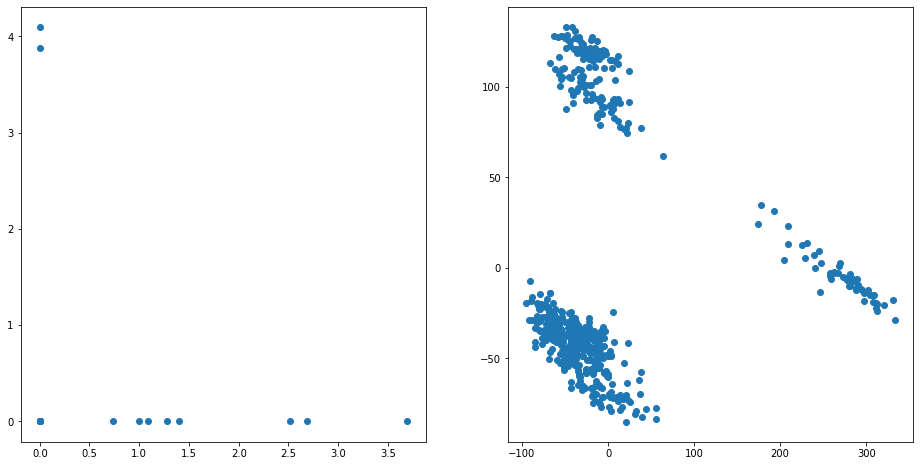

In [83]:
# Plot first two dimensions of log-transformed data
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,8))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax1.scatter(X_transformed[:, 0], X_transformed[:, 1])
ax2.scatter(log_transformed.transform(X_transformed)[:, 0], log_transformed.transform(X_transformed)[:, 1])

plt.show()

## MDS

In [92]:
from sklearn.manifold import MDS
d   = 2
mds = MDS(n_components = d, dissimilarity = 'euclidean')
mds = mds.fit(X_transformed)

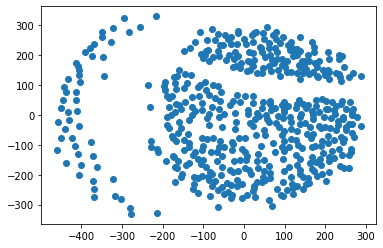

In [93]:
# Plot first two dimensions of log-transformed data
import matplotlib.pyplot as plt

plt.scatter(mds.embedding_[:, 0], mds.embedding_[:, 1])
plt.show()

## t-SNE

In [109]:
# Project data into top 50 PCs
from sklearn.decomposition import PCA

principal_components = 50
pca = PCA(n_components = principal_components)
pca = pca.fit(X_transformed)
pca_transformed = pca.transform(X_transformed)

In [115]:
from sklearn.manifold import TSNE

d, perplexity = 2, 40
tsne = TSNE(n_components = 2, metric = 'euclidean')
tsne = tsne.fit(pca_transformed)

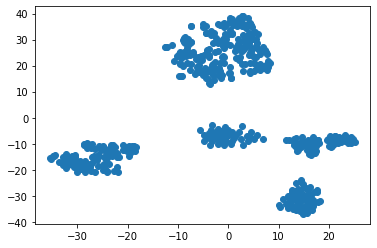

In [116]:
# Plot first two dimensions of log-transformed data
import matplotlib.pyplot as plt

plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
plt.show()